In [ ]:
Частина перша: Знайомство з Pandas.
Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)" посилання

Необхідно нико на:

Вивести перші рядки таблиці за допомогою мет
оду head Визначте кількість рядків та стовпців у датафреймі (атриб
т shape) Замініть у таблиці значення "—" на зн
чення NaN Визначте типи всіх стовпців за допомогою dataf
ame.dtypes Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходивс
символ "—" Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи i
null та sum) Видаліть з таблиці дані по всій країні, останній
рядок таблиці Замініть відсутні дані в стовпцях середніми значеннями цих стовпців
(метод fillna) Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за сер
дній по Україні У якому регіоні була найвища народжуван
сть у 2014 році? Побудуйте стовпчикову діаграму народжуваності по ре
онах у 2019 році

Робота здається у вигляді Jupy
ter файлу Hw2.1.ipynb
Імпортуємо всі необхідні бібліотеки

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import os

os.environ['PYTHONIOENCODING'] = 'UTF-8'

url = "https://uk.wikipedia.org/wiki/Населення_України"
try:
    # Try to read HTML tables from the URL
    response = requests.get(url)
    # Check if the request was successful
    if response.status_code == 200:
        # Decode the content using UTF-8 encoding
        html_content = response.content.decode('utf-8')
        html_file = StringIO(html_content)
        # Read HTML tables from the decoded content
        tables = pd.read_html(html_file, match="Коефіцієнт народжуваності")

    if tables:
        #print(tables)
        df = tables[0]
        print("All tables\n", df)
        print("\nThe first 5 lines:\n", df.head(5)) # Find the first 5 lines
    else:
        print("No tables found on the page.")

except Exception as e:
    print("Error:", e)

All tables
                Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126    —    —
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82    —
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51    —
12          Львівська  234.0  240.0  171.0   140    91   119  119

**Визначте кількість рядків та стовпців у датафреймі (атрибут shape)**

In [ ]:
print("Загальна кількість рядків і стовпців:", (df.shape) )

Загальна кількість рядків і стовпців: (28, 9)


**Замініть у таблиці значення "—" на значення NaN**

In [ ]:
df.replace("—", float("NaN"), inplace=True)
print(df)

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51  NaN
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

**Визначте типи всіх стовпців за допомогою dataframe.dtypes. Замініть типи нечислових колонок на числові. Підказка - це колонки 2014 та 2019.**

In [ ]:
df['2014'] = pd.to_numeric(df['2014'], errors='coerce')
df['2019'] = pd.to_numeric(df['2019'], errors='coerce')
print(df.dtypes)
print(df)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object
               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0

**Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)**

In [ ]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

missing_values_proportion = missing_values / df.shape[0]
print("\n",missing_values_proportion)

Missing values:
 Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

 Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


**Видаліть з таблиці дані по всій країні, останній рядок таблиці**

In [ ]:
df.drop(index=df.index[-1],axis=0,inplace=True)
print(df)

               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0    NaN
12          Львівська  23

**Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)**

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format) # use for .2f format
column_means = df.iloc[:, 1:].mean()
df = df.fillna(column_means)
print(df)

               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим 230.00 206.00 160.00   130    73   126 111.44  80.17
1           Вінницька 224.00 192.00 142.00   124    84   112 109.00  76.00
2           Волинська 247.00 250.00 179.00   153   112   148 141.00 101.00
3    Дніпропетровська 204.00 204.00 151.00   123    71   112 111.00  71.00
4            Донецька 271.00 214.00 140.00   109    61    98  82.00  80.17
5         Житомирська 261.00 223.00 159.00   129    89   122 120.00  79.00
6        Закарпатська 314.00 273.00 207.00   168   115   151 146.00 104.00
7          Запорізька 219.00 197.00 150.00   124    71   106 106.00  68.00
8   Івано-Франківська 243.00 248.00 182.00   155   103   124 122.00  88.00
9            Київська 204.00 189.00 156.00   123    73   122 121.00  80.00
10     Кіровоградська 216.00 171.00 145.00   126    79   110 108.00  68.00
11          Луганська 262.00 235.00 144.00   116    62    96  51.00  80.17
12          Львівська 234

**Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні**

In [ ]:
average_birth_rate = df["2019"].mean()
print(average_birth_rate)
above_average_regions = df[(df["2019"]) > average_birth_rate]

# Print the list of regions
print(above_average_regions["Регіон"])

80.17391304347828
2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


**У якому регіоні була найвища народжуваність у 2014 році?**

In [ ]:
highest_birth_rate_index = df["2014"].idxmax()
highest_birth_rate_region = df.loc[highest_birth_rate_index, "Регіон"]
print("Region:", highest_birth_rate_region)

Region: Рівненська


**Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році**

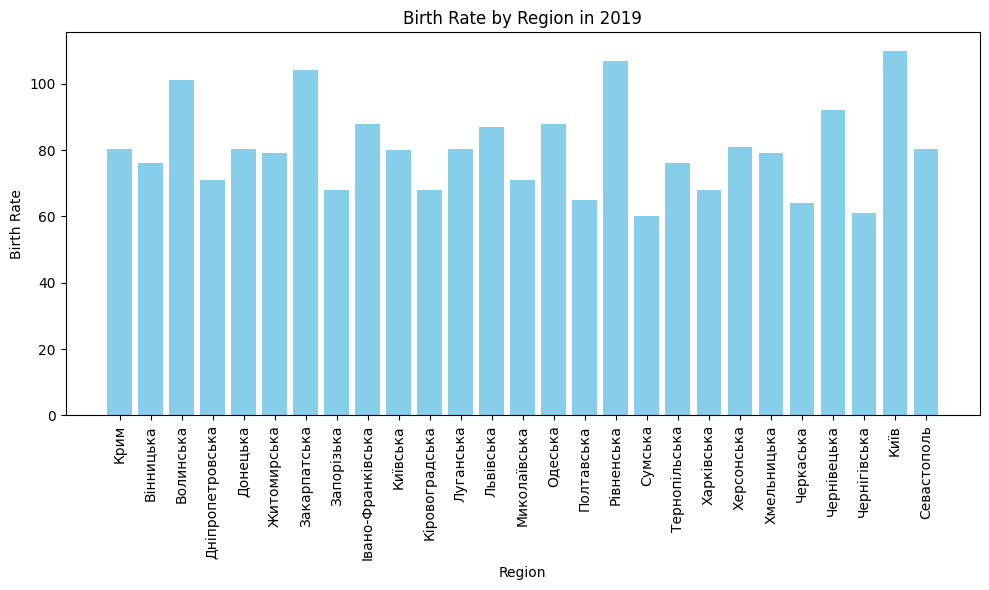

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df["Регіон"], df["2019"], color='skyblue')
# Add labels and title
plt.xlabel('Region')
plt.ylabel('Birth Rate')
plt.title('Birth Rate by Region in 2019')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()